In [34]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [35]:
from absa.config import DATA_PATHS
from absa.dataset import load_dataset
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
train_ds_path = DATA_PATHS['asba.semeval16.raw.train']
df = load_dataset(train_ds_path)

In [37]:
df.head()

,id,text,target,category,polarity,from,to
0,1004293:0,Judging from previous posts this used to be a ...,place,RESTAURANT#GENERAL,negative,51,56
1,1004293:1,"We, there were four of us, arrived at noon - t...",staff,SERVICE#GENERAL,negative,75,80
2,1004293:2,"They never brought us complimentary noodles, i...",NULL,SERVICE#GENERAL,negative,0,0
3,1004293:3,The food was lousy - too sweet or too salty an...,food,FOOD#QUALITY,negative,4,8
4,1004293:3,The food was lousy - too sweet or too salty an...,portions,FOOD#STYLE_OPTIONS,negative,52,60


In [38]:
class_labels = list(set(df.category))
pd.DataFrame([{'property': 'num_class_labels', 'value': '%d' % len(class_labels)}, {'property': 'class_labels','value': ', '.join(class_labels)}])

,property,value
0,num_class_labels,12
1,class_labels,"DRINKS#PRICES, FOOD#QUALITY, RESTAURANT#PRICES..."


In [55]:
data = {'id': df.id, 'text': df.text}
data.update({c: df.category == c for c in class_labels})

pd.DataFrame(data)

,id,text,DRINKS#PRICES,FOOD#QUALITY,RESTAURANT#PRICES,SERVICE#GENERAL,RESTAURANT#MISCELLANEOUS,FOOD#PRICES,FOOD#STYLE_OPTIONS,AMBIENCE#GENERAL,DRINKS#QUALITY,LOCATION#GENERAL,RESTAURANT#GENERAL,DRINKS#STYLE_OPTIONS
0,1004293:0,Judging from previous posts this used to be a ...,False,False,False,False,False,False,False,False,False,False,True,False
1,1004293:1,"We, there were four of us, arrived at noon - t...",False,False,False,True,False,False,False,False,False,False,False,False
2,1004293:2,"They never brought us complimentary noodles, i...",False,False,False,True,False,False,False,False,False,False,False,False
3,1004293:3,The food was lousy - too sweet or too salty an...,False,True,False,False,False,False,False,False,False,False,False,False
4,1004293:3,The food was lousy - too sweet or too salty an...,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,FF#10:8,The waitress came to check in on us every few ...,False,False,False,True,False,False,False,False,False,False,False,False
2503,FF#10:9,I couldn't ignore the fact that she reach over...,False,False,False,True,False,False,False,False,False,False,False,False
2504,FF#10:10,She then put the check down without asking if ...,False,False,False,True,False,False,False,False,False,False,False,False
2505,FF#10:11,"I wish I could like this place more, and I wis...",False,False,False,False,False,False,False,False,False,False,True,False


In [11]:
class_label_freq = pd.DataFrame([{'class_label': c, 'frequency': df.category[df.category==c].shape[0]} for c in class_labels])

class_label_freq

,class_label,frequency
0,DRINKS#PRICES,20
1,FOOD#QUALITY,849
2,RESTAURANT#PRICES,80
3,SERVICE#GENERAL,449
4,RESTAURANT#MISCELLANEOUS,98
5,FOOD#PRICES,90
6,FOOD#STYLE_OPTIONS,137
7,AMBIENCE#GENERAL,255
8,DRINKS#QUALITY,47
9,LOCATION#GENERAL,28


In [36]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
# Create a blank Tokenizer with just the English vocab
tokenize = Tokenizer(nlp.vocab)

In [37]:
df.loc[:, 'tokens'] = df.text.apply(tokenize)

In [38]:
def count_freq(docs):
    vocab = list()
    word_count = {}
    for doc in docs:
        for word in doc:
            word = str(word)
            vocab.append(word)
            if word not in word_count:
                word_count[word] = 0
            word_count[word] += 1
    return sorted(word_count.items(), key=lambda x: x[1], reverse=True)

In [39]:
df.groupby('category')['tokens'].apply(count_freq)

category
AMBIENCE#GENERAL            [(the, 248), (and, 166), (is, 128), (a, 121), ...
DRINKS#PRICES               [(and, 14), (the, 13), (is, 9), (wine, 7), (a,...
DRINKS#QUALITY              [(the, 33), (and, 28), (a, 13), (The, 13), (wi...
DRINKS#STYLE_OPTIONS        [(a, 17), (is, 16), (the, 16), (The, 15), (and...
FOOD#PRICES                 [(and, 58), (the, 51), (a, 43), (is, 35), (foo...
FOOD#QUALITY                [(the, 764), (and, 505), (was, 319), (is, 280)...
FOOD#STYLE_OPTIONS          [(and, 86), (the, 85), (The, 62), (a, 45), (wa...
LOCATION#GENERAL            [(the, 36), (and, 18), (is, 17), (a, 15), (of,...
RESTAURANT#GENERAL          [(I, 146), (the, 144), (and, 112), (to, 100), ...
RESTAURANT#MISCELLANEOUS    [(a, 60), (the, 53), (and, 47), (to, 39), (is,...
RESTAURANT#PRICES           [(the, 64), (and, 41), (a, 26), (is, 26), (to,...
SERVICE#GENERAL             [(the, 371), (and, 302), (was, 154), (to, 153)...
Name: tokens, dtype: object

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = df['text']
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)
y = df['category']

In [41]:
from sklearn import tree

In [68]:
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=100)

clf = clf.fit(X, y)

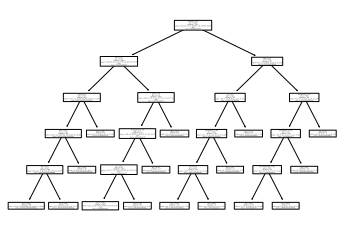

In [69]:
tree.plot_tree(clf, feature_names=vectorizer.get_feature_names(), class_names=clf.classes_)

plt.show()